<a href="https://colab.research.google.com/github/awesomeRJR/Rohanjamesramesh/blob/main/Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler


In [45]:
train=pd.read_csv('/content/insurance train.csv')
test=pd.read_csv('/content/test.csv')
sub = pd.read_csv('/content/sample_submission.csv')

In [3]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2,Male,76.0,1.0,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4,Male,21.0,1.0,11.0,1.0,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5,Female,29.0,1.0,41.0,1.0,< 1 Year,No,27496.0,152.0,39.0,0.0


In [4]:
train.shape

(164947, 12)

In [6]:
train.drop("id",axis =1)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,Male,76.0,1.0,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,Male,21.0,1.0,11.0,1.0,< 1 Year,No,28619.0,152.0,203.0,0.0
4,Female,29.0,1.0,41.0,1.0,< 1 Year,No,27496.0,152.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
164942,Male,40.0,1.0,8.0,0.0,1-2 Year,Yes,35835.0,26.0,267.0,1.0
164943,Male,30.0,1.0,30.0,1.0,< 1 Year,No,60125.0,152.0,101.0,0.0
164944,Female,41.0,1.0,8.0,1.0,1-2 Year,No,59623.0,124.0,43.0,0.0
164945,Female,22.0,1.0,35.0,1.0,< 1 Year,No,24857.0,152.0,245.0,0.0


In [8]:
train.drop(train.tail(1).index,inplace=True)

In [9]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


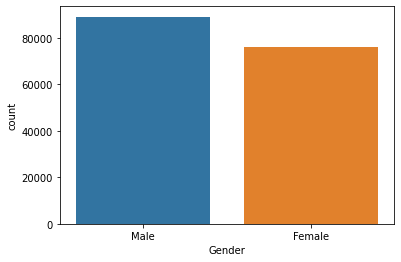

In [10]:
sns.countplot(train.Gender)

In [11]:
df=train.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

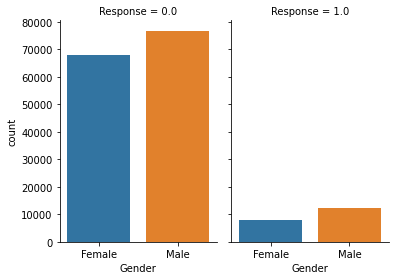

In [12]:
g = sns.catplot(x="Gender", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

In [13]:
df=train.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
df

,Gender,Driving_License
0,Female,75883
1,Male,89063


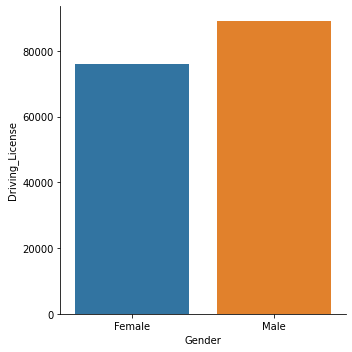

In [14]:
sns.catplot(x="Gender", y="Driving_License",
                data=df, kind="bar");

In [15]:
df=train.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

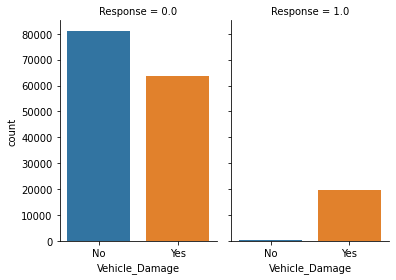

In [16]:
g = sns.catplot(x="Vehicle_Damage", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

In [17]:
train['Gender'] = train['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

In [18]:
train=pd.get_dummies(train,drop_first=True)

In [19]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,1,44.0,1.0,28.0,0.0,40454.0,26.0,217.0,1.0,0,1,1
1,2,1,76.0,1.0,3.0,0.0,33536.0,26.0,183.0,0.0,0,0,0
2,3,1,47.0,1.0,28.0,0.0,38294.0,26.0,27.0,1.0,0,1,1
3,4,1,21.0,1.0,11.0,1.0,28619.0,152.0,203.0,0.0,1,0,0
4,5,0,29.0,1.0,41.0,1.0,27496.0,152.0,39.0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164941,164942,1,60.0,1.0,28.0,0.0,48578.0,25.0,202.0,1.0,0,0,1
164942,164943,1,40.0,1.0,8.0,0.0,35835.0,26.0,267.0,1.0,0,0,1
164943,164944,1,30.0,1.0,30.0,1.0,60125.0,152.0,101.0,0.0,1,0,0
164944,164945,0,41.0,1.0,8.0,1.0,59623.0,124.0,43.0,0.0,0,0,0


In [20]:
train=train.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
train['Vehicle_Age_lt_1_Year']=train['Vehicle_Age_lt_1_Year'].astype('int')
train['Vehicle_Age_gt_2_Years']=train['Vehicle_Age_gt_2_Years'].astype('int')
train['Vehicle_Damage_Yes']=train['Vehicle_Damage_Yes'].astype('int')

In [21]:
train["premium_age_ratio"] = train["Annual_Premium"]/train["Age"]

In [22]:
train["premium_vintage_ratio"] = train["Annual_Premium"]/train["Vintage"]

In [23]:
train


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes,premium_age_ratio,premium_vintage_ratio
0,1,1,44.0,1.0,28.0,0.0,40454.0,26.0,217.0,1.0,0,1,1,919.409091,186.423963
1,2,1,76.0,1.0,3.0,0.0,33536.0,26.0,183.0,0.0,0,0,0,441.263158,183.256831
2,3,1,47.0,1.0,28.0,0.0,38294.0,26.0,27.0,1.0,0,1,1,814.765957,1418.296296
3,4,1,21.0,1.0,11.0,1.0,28619.0,152.0,203.0,0.0,1,0,0,1362.809524,140.980296
4,5,0,29.0,1.0,41.0,1.0,27496.0,152.0,39.0,0.0,1,0,0,948.137931,705.025641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164941,164942,1,60.0,1.0,28.0,0.0,48578.0,25.0,202.0,1.0,0,0,1,809.633333,240.485149
164942,164943,1,40.0,1.0,8.0,0.0,35835.0,26.0,267.0,1.0,0,0,1,895.875000,134.213483
164943,164944,1,30.0,1.0,30.0,1.0,60125.0,152.0,101.0,0.0,1,0,0,2004.166667,595.297030
164944,164945,0,41.0,1.0,8.0,1.0,59623.0,124.0,43.0,0.0,0,0,0,1454.219512,1386.581395


In [24]:
num_feat = ['Age','Vintage','premium_age_ratio','premium_vintage_ratio']
ss = StandardScaler()
train[num_feat] = ss.fit_transform(train[num_feat])

In [25]:
mm = MinMaxScaler()
train[['Annual_Premium']] = mm.fit_transform(train[['Annual_Premium']])

In [26]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes,premium_age_ratio,premium_vintage_ratio
0,1,1,0.333706,1.0,28.0,0.0,0.070366,26.0,0.747053,1.0,0,1,1,0.025467,-0.320623
1,2,1,2.397083,1.0,3.0,0.0,0.057496,26.0,0.340898,0.0,0,0,0,-0.772703,-0.326395
2,3,1,0.527148,1.0,28.0,0.0,0.066347,26.0,-1.522637,1.0,0,1,1,-0.149214,1.924435
3,4,1,-1.149346,1.0,11.0,1.0,0.048348,152.0,0.579812,0.0,1,0,0,0.765635,-0.403443
4,5,0,-0.633502,1.0,41.0,1.0,0.046259,152.0,-1.379288,0.0,1,0,0,0.073424,0.624516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164941,164942,1,1.365394,1.0,28.0,0.0,0.085479,25.0,0.567867,1.0,0,0,1,-0.157782,-0.222098
164942,164943,1,0.075784,1.0,8.0,0.0,0.061773,26.0,1.344339,1.0,0,0,1,-0.013819,-0.415776
164943,164944,1,-0.569021,1.0,30.0,1.0,0.106960,152.0,-0.638653,0.0,1,0,0,1.836253,0.424538
164944,164945,0,0.140264,1.0,8.0,1.0,0.106027,124.0,-1.331505,0.0,0,0,0,0.918226,1.866635


In [27]:
train=train.drop('id',axis=1)

Test data


In [28]:
test['Gender'] = test['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
test=pd.get_dummies(test,drop_first=True)
test=test.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
test['Vehicle_Age_lt_1_Year']=test['Vehicle_Age_lt_1_Year'].astype('int')
test['Vehicle_Age_gt_2_Years']=test['Vehicle_Age_gt_2_Years'].astype('int')
test['Vehicle_Damage_Yes']=test['Vehicle_Damage_Yes'].astype('int')
test["premium_age_ratio"] = test["Annual_Premium"]/test["Age"]
test["premium_vintage_ratio"] = test["Annual_Premium"]/test["Vintage"]
test=test.drop('id',axis=1)

In [29]:
test

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes,premium_age_ratio,premium_vintage_ratio
0,1,25,1,11,1,35786,152,53,1,0,0,1431.440000,675.207547
1,1,40,1,28,0,33762,7,111,0,0,1,844.050000,304.162162
2,1,47,1,28,0,40050,124,199,0,0,1,852.127660,201.256281
3,1,24,1,27,1,37356,152,187,1,0,1,1556.500000,199.764706
4,1,27,1,28,1,59097,152,297,1,0,0,2188.777778,198.979798
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127032,0,26,1,37,1,30867,152,56,1,0,0,1187.192308,551.196429
127033,0,38,1,28,0,28700,122,165,0,0,1,755.263158,173.939394
127034,1,21,1,46,1,29802,152,74,1,0,0,1419.142857,402.729730
127035,1,71,1,28,1,62875,26,265,0,0,0,885.563380,237.264151


In [30]:
ss = StandardScaler()
test[num_feat] = ss.fit_transform(test[num_feat])


mm = MinMaxScaler()
test[['Annual_Premium']] = mm.fit_transform(test[['Annual_Premium']])

train test split


In [31]:
training_data, testing_data = train.drop('Response', axis=1),train['Response']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(training_data,testing_data, test_size=0.3, random_state=42)

In [35]:
x_train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes,premium_age_ratio,premium_vintage_ratio
131854,0,0.269226,1.0,0.0,0.0,0.000000,26.0,-1.439017,0,0,0,-1.407204,-0.519403
139414,1,-0.117658,1.0,27.0,0.0,0.048793,124.0,-0.208606,0,0,1,-0.207339,-0.276486
41036,0,-0.117658,1.0,27.0,1.0,0.000000,156.0,0.603704,0,0,0,-1.390648,-0.636995
49386,1,0.398187,1.0,30.0,1.0,0.039378,124.0,0.340898,0,0,0,-0.626540,-0.423385
156922,1,0.591628,1.0,8.0,1.0,0.098239,26.0,-0.805893,0,0,1,0.418634,0.500918
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,1,-0.633502,1.0,28.0,1.0,0.000000,157.0,-0.578924,0,0,1,-1.357915,-0.615158
103694,1,0.333706,1.0,28.0,1.0,0.072202,124.0,-0.770056,0,0,0,0.062912,0.178793
131932,0,-1.084865,1.0,2.0,0.0,0.030188,152.0,-0.937296,1,0,1,-0.078485,-0.208187
146867,1,0.333706,1.0,32.0,1.0,0.000000,156.0,-1.235939,0,0,1,-1.409525,-0.566394


In [36]:
x_test

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes,premium_age_ratio,premium_vintage_ratio
55666,1,-0.762463,1.0,12.0,1.0,0.054676,152.0,-1.116482,1,0,0,0.470363,0.296274
83340,1,0.075784,1.0,28.0,0.0,0.050577,124.0,0.687324,0,0,1,-0.264965,-0.404052
152616,1,0.075784,1.0,30.0,1.0,0.000000,124.0,-1.677932,0,0,0,-1.399547,-0.318011
37240,0,-0.633502,1.0,3.0,0.0,0.031927,152.0,-1.642094,1,0,1,-0.370035,1.461415
44229,0,0.140264,1.0,20.0,0.0,0.000000,124.0,1.595200,0,0,1,-1.402224,-0.643734
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21110,0,-0.311099,1.0,28.0,0.0,0.093551,155.0,0.651487,0,0,1,1.088766,-0.198941
90613,0,-0.891424,1.0,17.0,0.0,0.083955,152.0,1.654928,1,0,0,1.679661,-0.363313
96790,0,-0.697982,1.0,10.0,1.0,0.041906,152.0,1.189045,1,0,0,-0.009556,-0.479880
71794,0,-0.633502,1.0,46.0,1.0,0.057767,152.0,1.165153,1,0,0,0.429503,-0.416787


Using naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [38]:
y_pred1=gnb.predict(x_test)
print(y_pred1)

[0. 1. 0. ... 0. 0. 1.]


In [39]:
from sklearn.metrics import accuracy_score
ac1=accuracy_score(y_test,y_pred1)
print(ac1)

0.7077641257780293


In [42]:
matrix=confusion_matrix(y_test,y_pred1)
print("confusion matrix: \n",matrix)
matrix=classification_report(y_test,y_pred1)
print("classicfication report: \n",matrix)

confusion matrix: 
 [[29679 13764]
 [  697  5344]]
classicfication report: 
               precision    recall  f1-score   support

         0.0       0.98      0.68      0.80     43443
         1.0       0.28      0.88      0.42      6041

    accuracy                           0.71     49484
   macro avg       0.63      0.78      0.61     49484
weighted avg       0.89      0.71      0.76     49484



accuracy:  0.7077641257780293


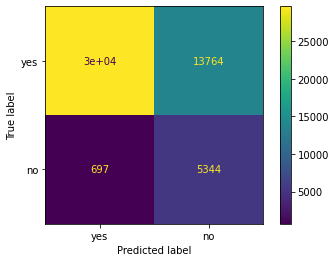

In [46]:
labels=["yes","no"]
cm=confusion_matrix(y_test,y_pred1)
cmd=ConfusionMatrixDisplay(cm,display_labels=labels)
cmd.plot()
result2=accuracy_score(y_test,y_pred1)
print("accuracy: ",result2)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [48]:
y_pred=classifier.predict(x_test)
y_pred
print(x_test)
print(y_pred)

        Gender       Age  Driving_License  Region_Code  Previously_Insured  \
55666        1 -0.762463              1.0         12.0                 1.0   
83340        1  0.075784              1.0         28.0                 0.0   
152616       1  0.075784              1.0         30.0                 1.0   
37240        0 -0.633502              1.0          3.0                 0.0   
44229        0  0.140264              1.0         20.0                 0.0   
...        ...       ...              ...          ...                 ...   
21110        0 -0.311099              1.0         28.0                 0.0   
90613        0 -0.891424              1.0         17.0                 0.0   
96790        0 -0.697982              1.0         10.0                 1.0   
71794        0 -0.633502              1.0         46.0                 1.0   
115834       0 -0.246619              1.0         45.0                 0.0   

        Annual_Premium  Policy_Sales_Channel   Vintage  Vehicle

confusion matrix:
[[41239  2204]
 [ 4980  1061]]
accuracy: 0.8548217605690729


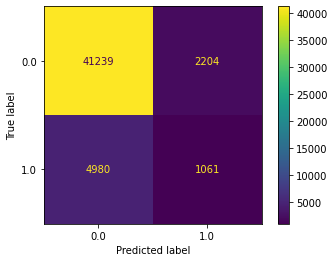

In [50]:
result=confusion_matrix(y_test,y_pred)
print("confusion matrix:")
print(result)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
result2=accuracy_score(y_test,y_pred)
print("accuracy:",result2)